In [1]:
import numpy as np
import pandas as pd
import nltk
import spacy
import requests
from bs4 import BeautifulSoup
import time
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

In [2]:
# Download necessary NLTK data
nltk.download('punkt')

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
drive_path = 'put here'
"""

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\ndrive_path = 'put here'\n"

In [28]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
# Drop unnecessary columns and rename the necessary ones
df_spam = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
df_spam.columns = ['label', 'text']
df_spam

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [3]:

def most_frequent_words(df, all_words, amount):

  # Remove punctuation and split into words
  words = re.findall(r'\b\w+\b', all_words)

  # Get the 5 most common words
  most_common_words = Counter(words).most_common(5)
  print("5 most frequent words:")
  for word, freq in most_common_words:
      print(f"{word}: {freq}")

def count_of_words_apear_once(df, all_words):

  # Combine all text into a single string
  words = re.findall(r'\b\w+\b', all_words)
  # Count word frequencies
  word_freq = Counter(words)

  # Count words that appear only once
  unique_words = sum(1 for word, freq in word_freq.items() if freq == 1)
  print(f"Number of words that only appear once: {unique_words}")

def avg_words_per_message(df, column):
  df['word_count'] = df[column].apply(lambda x: len(x.split()))
  average_words = df['word_count'].mean()
  print(f"Average number of words per message: {average_words:.2f}")

def total_num_of_data(df):
  total_messages = len(df)
  print(f"Total number of messages: {total_messages}")

  # Function to print word statistics
def print_word_statistics(text):
    str = " ".join(text)
    words = word_tokenize(str)
    total_words = len(words)
    unique_words = len(set(words))
    word_freq = Counter(words)
    most_common_words = word_freq.most_common(10)

    print(f"Total words: {total_words}")
    print(f"Unique words: {unique_words}")

# **Basic Analysis - Before Proccessing**

In [29]:
num_spam = len(df_spam[df_spam['label'] == 'spam'])
num_ham = len(df_spam[df_spam['label'] == 'ham'])
print(f"Number of spam messages: {num_spam}")
print(f"Number of ham messages: {num_ham}")

Number of spam messages: 747
Number of ham messages: 4825


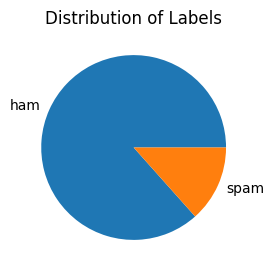

In [30]:
df_spam.label.value_counts().plot(kind='pie', figsize=(3, 3))
plt.title('Distribution of Labels')
plt.ylabel('')  # This removes the y-label which is not meaningful in a pie chart
plt.show()

In [31]:
# Combine all text into a single string
all_words = ' '.join(df_spam['text']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df_spam)

print_word_statistics(df_spam['text'])

# Average number of words per message
avg_words_per_message(df_spam, 'text')
# 5 most frequent words
most_frequent_words(df_spam, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df_spam, all_words)


---------Before Text Processing-------
Total number of messages: 5572
Total words: 104164
Unique words: 11528
Average number of words per message: 15.49
5 most frequent words:
i: 3001
to: 2242
you: 2240
a: 1433
the: 1328
Number of words that only appear once: 4376


# **Text Processing**

# Cleaning The Data

In [4]:
def data_cleaning(df, column):
  # Handle missing values
  df = df.dropna()  # Drop rows with any missing values

  # Convert text to lowercase
  df[column] = df[column].str.lower()

  # Remove punctuation
  df[column] = df[column].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

  # Remove special characters
  df[column] = df[column].apply(lambda x: re.sub(r'[^a-zA-Zא-ת0-9\s]', '', x))

  # Step 6: Remove stop words
  df[column] = df[column].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

  # Use the sub() method to replace URLs with the specified replacement text
  df[column] =df[column].apply(lambda x : re.sub(r'https\S*', '', x))

  # Replace empty strings with NaN
  df[column] = df[column].replace('', pd.NA)

  # Drop rows with NaN values in the specified column
  df = df.dropna(subset=[column])
  # Display the first few rows of the cleaned DataFrame
  print("Cleaned data preview:")
  print(df)
  return df

In [32]:
df_spam = data_cleaning(df_spam , 'text')

Cleaned data preview:
     label                                               text  word_count
0      ham  go jurong point crazy available bugis n great ...          20
1      ham                            ok lar joking wif u oni           6
2     spam  free entry 2 wkly comp win fa cup final tkts 2...          28
3      ham                u dun say early hor u c already say          11
4      ham        nah dont think goes usf lives around though          13
...    ...                                                ...         ...
5567  spam  2nd time tried 2 contact u u 750 pound prize 2...          30
5568   ham                          b going esplanade fr home           8
5569   ham                        pity mood soany suggestions          10
5570   ham  guy bitching acted like id interested buying s...          26
5571   ham                                     rofl true name           6

[5567 rows x 3 columns]


# **Basic Analysis - After Proccessing**

In [33]:
# Combine all text into a single string
all_words = ' '.join(df_spam['text']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df_spam)

print_word_statistics(df_spam['text'])

# Average number of words per message
avg_words_per_message(df_spam, 'text')
# 5 most frequent words
most_frequent_words(df_spam, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df_spam, all_words)

---------After Text Processing-------
Total number of messages: 5567
Total words: 52243
Unique words: 9345
Average number of words per message: 9.36
5 most frequent words:
u: 1119
call: 576
2: 478
im: 471
get: 386
Number of words that only appear once: 5138


# Nltk Tokenizer

In [34]:
from nltk.tokenize import word_tokenize

start_time = time.time()

# Tokenize using NLTK
df_spam['nltk_tokens'] = df_spam['text'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df_spam['nltk_tokens'].head(10))

NLTK tokenization time: 0.5486395359039307 seconds
0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, 2, wkly, comp, win, fa, cup, fin...
3        [u, dun, say, early, hor, u, c, already, say]
4    [nah, dont, think, goes, usf, lives, around, t...
5    [freemsg, hey, darling, 3, weeks, word, back, ...
6    [even, brother, like, speak, treat, like, aids...
7    [per, request, melle, melle, oru, minnaminungi...
8    [winner, valued, network, customer, selected, ...
9    [mobile, 11, months, u, r, entitled, update, l...
Name: nltk_tokens, dtype: object


# SpaCy Tokenizer


In [35]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = English()
tokenizer = Tokenizer(nlp.vocab)
start_time = time.time()
tokens = tokenizer(all_words)
print(list(tokens)[:30])

spacy_time = time.time() - start_time
print(f"spaCy tokenization time: {spacy_time} seconds")

[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat, ok, lar, joking, wif, u, oni, free, entry, 2, wkly, comp, win, fa, cup]
spaCy tokenization time: 0.3083343505859375 seconds


# **NLTK and SpaCy Tokenization comparison**

 NLTK returns a list of strings, which represents a tokenized word, while spaCy returns a list of spaCy token objects.  spaCy's tokenization takes approximately half of the time of NLTK.      
 Language Support:

NLTK:  offers support for tokenization in various languages, although it may require additional configurations or resources for some languages.

spaCy: designed to support multiple languages out of the box, and its tokenization capabilities are optimized for efficiency.

# Lemmatization with Nltk

In [36]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
x = all_words.split()
start_time = time.time()

for w in x:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0.2107384204864502

In [37]:
print('15 examples of tokens where the token text differs from its lemma')
count = 0
for w in x:
    if w != lemmatizer.lemmatize(w, pos='n'):
        print(w +':' + lemmatizer.lemmatize(w, pos='n'))
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
goes:go
lives:life
weeks:week
aids:aid
callers:caller
friends:friend
hours:hour
months:month
mobiles:mobile
chances:chance
pounds:pound
words:word
times:time
months:month
sucks:suck


# Lemmatization with SpaCy

In [38]:
import spacy
import time
# Load spaCy model
nlp = spacy.load('en_core_web_sm')


def lemmatize_with_spacy(text):
    doc = nlp(text)
    lemmatized_text = ' '.join([token.lemma_ for token in doc])
    return lemmatized_text

start_time = time.time()
df_spam['lemmatized_spacy'] = df_spam['text'].apply(lemmatize_with_spacy)
spacy_time = time.time() - start_time

print(f"Lemmatization time using spaCy: {spacy_time:.6f} seconds")


Lemmatization time using spaCy: 54.206784 seconds


In [39]:
# Initialize counter
count = 0
print('15 examples of tokens where the token text differs from its lemma')

# Print 15 examples of tokens where the token text differs from its lemma
for token in nlp(all_words):
    if token.text != token.lemma_:
        print(f"{token.text:>20} : {token.lemma_}")
        count += 1
        if count >= 15:
            break

15 examples of tokens where the token text differs from its lemma
                 got : get
              joking : joke
                  nt : not
                goes : go
               lives : live
               weeks : week
             callers : caller
             friends : friend
              valued : value
            selected : select
               hours : hour
              months : month
            entitled : entitle
              latest : late
             mobiles : mobile


# **NLTK and SpaCy Lemmatization comparison**

The lemmatization process using spaCy took approximately 51.12 seconds, which is significantly slower compared to NLTK. This indicates that while spaCy offers robust NLP capabilities, it may require more processing time for lemmatization.

**Output Format:** Both NLTK and spaCy produce lists of lemmatized words.
However, the actual lemmas produced can differ slightly due to the
underlying algorithms and linguistic models.

**Processing Speed:** NLTK is significantly faster in lemmatization compared to spaCy for the given dataset.

# Stemming with Nltk

In [40]:
import time
from nltk.stem import PorterStemmer
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(w) for w in words]
    return ' '.join(stemmed_words)

start_time = time.time()
df_spam['stemmed_nltk'] = df_spam['text'].apply(stem_with_nltk)
nltk_time = time.time() - start_time

print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemming time using NLTK: 2.183867 seconds


# Stemming with spaCy - SpaCy itself does not include a stemming function

# **Web Scraping**


In [5]:

url = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAACHRzA667AARXS__2v5de8mNTKOyFF7jW-cvNi0GO_xT-fg69PydO0Xa5iRXetlJA6ZBGR8ToumsedNBLhkHE7kaWLicN4ilmYfg8EShk1l-Suxct2famqmVFYAZhpPEHLJQLWiwAb9eATIGeIh_NniR12bb44fwIwKtuw-o1c1i"  # Replace with the actual URL
response = requests.get(url)

if response.status_code == 200:
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    # Extracting post texts from a hypothetical social media profile
    posts = soup.find_all('p')  # This will vary based on the actual HTML structure
    for post in posts:
        post.get_text()
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


In [6]:
len(posts)
df = pd.DataFrame(posts, columns=['posts'])
print(df)

                                                posts
0   We are experiencing some temporary issues. The...
1   The latest data comes as economists have warne...
2   Taiwan Semiconductor Manufacturing Company (TS...
3   Saving money can be a challenge. Here are some...
4   Jobless claims just ticked up to their highest...
5   The weekly jobless claims report suggested tha...
6   'We may be approaching an inflection point,' o...
7   With inflation falling and signs of a slowing ...
8   Every market rally can have a bad day, and tha...
9   It's one of the Oracle of Omaha's all-time fav...
10  401(k) plans are among the most popular ways A...
11  The JPMorgan Chase CEO had some words of cauti...
12  If you're taking a required minimum distributi...
13  The Vickers Top Buyers & Sellers is a daily re...
14  These companies may not have the highest yield...
15  Vance, a former venture capitalist, has invest...
16  When Social Security represents at least 30% o...
17  Wedbush’s bull-case scen

# **Basic Analysis - Before Proccessing**

In [7]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------Before Text Processing-------
Total number of messages: 19
Total words: 880
Unique words: 485
Average number of words per message: 39.47
5 most frequent words:
the: 36
and: 19
a: 18
to: 16
of: 15
Number of words that only appear once: 329


# Data cleaning

In [8]:
column = 'posts'
data_cleaning(df, column)

Cleaned data preview:
                                                posts  word_count
0   experiencing temporary issues market data page...          28
1   latest data comes economists warned labor mark...          17
2   taiwan semiconductor manufacturing company tsm...         164
3   saving money challenge tips save groceries uti...          20
4   jobless claims ticked highest level since last...          12
5   weekly jobless claims report suggested getting...          22
6   may approaching inflection point one economist...          11
7   inflation falling signs slowing economy brewin...          18
8   every market rally bad day thats saw yesterday...          89
9           one oracle omahas alltime favorite stocks          10
10  401k plans among popular ways americans save r...          83
11  jpmorgan chase ceo words caution despite marke...          14
12  youre taking required minimum distribution ira...          77
13  vickers top buyers sellers daily report identi... 

,posts,word_count
0,experiencing temporary issues market data page...,28
1,latest data comes economists warned labor mark...,17
2,taiwan semiconductor manufacturing company tsm...,164
3,saving money challenge tips save groceries uti...,20
4,jobless claims ticked highest level since last...,12
5,weekly jobless claims report suggested getting...,22
6,may approaching inflection point one economist...,11
7,inflation falling signs slowing economy brewin...,18
8,every market rally bad day thats saw yesterday...,89
9,one oracle omahas alltime favorite stocks,10


# **Basic Analysis - After Proccessing**

In [9]:
# Combine all text into a single string
all_words = ' '.join(df['posts']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['posts'])

# Average number of words per message
avg_words_per_message(df, 'posts')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

---------After Text Processing-------
Total number of messages: 19
Total words: 880
Unique words: 485
Average number of words per message: 39.47
5 most frequent words:
the: 36
and: 19
a: 18
to: 16
of: 15
Number of words that only appear once: 329


# **NLTK Tokenization**

In [10]:

start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['posts'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

NLTK tokenization time: 0.013361215591430664 seconds
0    [We, are, experiencing, some, temporary, issue...
1    [The, latest, data, comes, as, economists, hav...
2    [Taiwan, Semiconductor, Manufacturing, Company...
3    [Saving, money, can, be, a, challenge, ., Here...
4    [Jobless, claims, just, ticked, up, to, their,...
5    [The, weekly, jobless, claims, report, suggest...
6    ['We, may, be, approaching, an, inflection, po...
7    [With, inflation, falling, and, signs, of, a, ...
8    [Every, market, rally, can, have, a, bad, day,...
9    [It, 's, one, of, the, Oracle, of, Omaha, 's, ...
Name: nltk_tokens, dtype: object


# White space tokenizer

In [11]:
from nltk.tokenize import WhitespaceTokenizer

# Create a reference variable for Class WhitespaceTokenizer
tk = WhitespaceTokenizer()

start_time = time.time()
# Use tokenize method
df['nltk_Whitespace_tokens'] = df['posts'].apply(tk.tokenize)
whitespace_time = time.time() - start_time

print(f"whitespace_time tokenization time: {whitespace_time} seconds")
df['nltk_Whitespace_tokens']

whitespace_time tokenization time: 0.0024476051330566406 seconds


0     [We, are, experiencing, some, temporary, issue...
1     [The, latest, data, comes, as, economists, hav...
2     [Taiwan, Semiconductor, Manufacturing, Company...
3     [Saving, money, can, be, a, challenge., Here, ...
4     [Jobless, claims, just, ticked, up, to, their,...
5     [The, weekly, jobless, claims, report, suggest...
6     ['We, may, be, approaching, an, inflection, po...
7     [With, inflation, falling, and, signs, of, a, ...
8     [Every, market, rally, can, have, a, bad, day,...
9     [It's, one, of, the, Oracle, of, Omaha's, all-...
10    [401(k), plans, are, among, the, most, popular...
11    [The, JPMorgan, Chase, CEO, had, some, words, ...
12    [If, you're, taking, a, required, minimum, dis...
13    [The, Vickers, Top, Buyers, &, Sellers, is, a,...
14    [These, companies, may, not, have, the, highes...
15    [Vance,, a, former, venture, capitalist,, has,...
16    [When, Social, Security, represents, at, least...
17    [Wedbush’s, bull-case, scenario, now, sees

# Regex tokenizer

In [12]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+|\$[\d\.]+|\S+')

start_time = time.time()
df['nltk_Regexp_tokens'] = df['posts'].apply(tokenizer.tokenize)
regex_time = time.time() - start_time

print(f"regex_time tokenization time: {regex_time} seconds")

df['nltk_Regexp_tokens']

regex_time tokenization time: 0.003330707550048828 seconds


0     [We, are, experiencing, some, temporary, issue...
1     [The, latest, data, comes, as, economists, hav...
2     [Taiwan, Semiconductor, Manufacturing, Company...
3     [Saving, money, can, be, a, challenge, ., Here...
4     [Jobless, claims, just, ticked, up, to, their,...
5     [The, weekly, jobless, claims, report, suggest...
6     ['We, may, be, approaching, an, inflection, po...
7     [With, inflation, falling, and, signs, of, a, ...
8     [Every, market, rally, can, have, a, bad, day,...
9     [It, 's, one, of, the, Oracle, of, Omaha, 's, ...
10    [401, (k), plans, are, among, the, most, popul...
11    [The, JPMorgan, Chase, CEO, had, some, words, ...
12    [If, you, 're, taking, a, required, minimum, d...
13    [The, Vickers, Top, Buyers, &, Sellers, is, a,...
14    [These, companies, may, not, have, the, highes...
15    [Vance, ,, a, former, venture, capitalist, ,, ...
16    [When, Social, Security, represents, at, least...
17    [Wedbush, ’s, bull, -case, scenario, now, 

# Sentence tokenizer

In [13]:
from nltk.tokenize import sent_tokenize

start_time = time.time()
df['nltk_sentence_tokens'] = df['posts'].apply(sent_tokenize)
sentence_time = time.time() - start_time

print(f"sentence_time tokenization time: {sentence_time} seconds")

sentence_time tokenization time: 0.00405120849609375 seconds


# **NLTK Lemmatization**

In [14]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)
lemmatizer = WordNetLemmatizer()
start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='n'))
time = time.time() - start_time
time

[nltk_data] Downloading package wordnet to /root/nltk_data...


['We', 'are', 'experiencing', 'some', 'temporary', 'issues', '.', 'The', 'market', 'data', 'on', 'this', 'page', 'is', 'currently', 'delayed', '.', 'Please', 'bear', 'with', 'us', 'as', 'we', 'address', 'this', 'and', 'restore', 'your', 'personalized', 'lists', '.', 'The', 'latest', 'data', 'comes', 'as', 'economists', 'have', 'warned', 'the', 'labor', 'market', 'may', 'be', 'nearing', 'an', "'inflection", 'point', '.', "'", 'Taiwan', 'Semiconductor', 'Manufacturing', 'Company', '(', 'TSM', ')', 'reported', 'better-than-expected', 'second', 'quarter', 'results', 'and', 'raised', 'its', 'full-year', 'revenue', 'forecast', '.', 'The', 'report', 'is', 'giving', 'other', 'chip', 'stocks', ',', 'like', 'Nvidia', '(', 'NVDA', ')', 'and', 'Advanced', 'Micro', 'Devices', '(', 'AMD', ')', ',', 'a', 'boost', 'and', 'pushing', 'the', 'Nasdaq', '(', '^IXIC', ')', 'slightly', 'higher', '.', 'Stocks', 'have', 'been', 'trending', 'higher', 'in', 'recent', 'days', 'as', 'investors', 'bet', 'the', 'Fed

1.5763463973999023

# **NLTK Stemming**

In [15]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")

Stemmed dataframe using NLTK:
we are experienc some temporari issu . the market data on thi page is current delay . pleas bear with us as we address thi and restor your person list . the latest data come as economist have warn the labor market may be near an 'inflect point . ' taiwan semiconductor manufactur compani ( tsm ) report better-than-expect second quarter result and rais it full-year revenu forecast . the report is give other chip stock , like nvidia ( nvda ) and advanc micro devic ( amd ) , a boost and push the nasdaq ( ^ixic ) slightli higher . stock have been trend higher in recent day as investor bet the feder reserv will start cut rate in septemb . at 10 a.m . et , chicago fed presid austan goolsbe will speak with yahoo financ about hi thought on rate and inflat . other trend ticker on yahoo financ includ netflix ( nflx ) , intel ( intc ) , and nokia oyj ( nok ) . top guest today include:9:00 a.m . et - brian jacobsen , annex wealth manag chief economist and strategist9:2

# **Feature extraction** - HW2

# BOW

In [16]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer with default settings
vectorizer = CountVectorizer()

# Fit the vectorizer on the corpus and transform the corpus into a BOW matrix
bow_matrix = vectorizer.fit_transform(all_tokens)

# Print the BOW matrix
print(bow_matrix.toarray())

# Print the feature names (i.e., unique words) learned by the vectorizer
print(vectorizer.get_feature_names_out())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
['00' '10' '1960' '20' '2022' '2025' '25' '28' '30' '40' '401' '50' '65'
 '73' '75' 'ability' 'about' 'above' 'access' 'according' 'account'
 'achieving' 'address' 'adjustment' 'advanced' 'advantages' 'after' 'age'
 'ages' 'air' 'airlines' 'all' 'almost' 'amd' 'american' 'americans'
 'among' 'an' 'analyst' 'analytics' 'and' 'annex' 'annual' 'appeared'
 'approaching' 'are' 'areas' 'as' 'at' 'august' 'austan' 'automatically'
 'average' 'bad' 'balances' 'base' 'based' 'be' 'bear' 'because' 'been'
 'bell' 'benefits' 'bet' 'better' 'blackstone' 'boost' 'born' 'both'
 'brewing' 'brezski' 'brian' 'broadening' 'bull' 'but' 'buyers' 'by' 'can'
 'cap' 'capitalist' 'carsten' 'case' 'cash' 'caution' 'ceo' 'cfra'
 'challenge' 'chase' 'chicago' 'chief' 'china' 'chip' 'claims' 'cola'
 'comes' 'coming' 'companies' 'company' 'compare' 'confident' 'consensus'
 'consistently' 'coo' 'cos

In [17]:
print(len(bow_matrix.toarray()))
print(len(all_tokens))
print(len(vectorizer.get_feature_names_out()))

880
880
441


# TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

# get tf-df values
result = tfidf.fit_transform(all_tokens)

# get idf values
print('\nidf values:')
for ele1, ele2 in zip(tfidf.get_feature_names_out(), tfidf.idf_):
    print(ele1, ':', ele2)

# get indexing
print('\nWord indexes:')
print(tfidf.vocabulary_)

# display tf-idf values
print('\ntf-idf value:')
print(result)

# in matrix form
print('\ntf-idf values in matrix form:')
print(result.toarray())


idf values:
00 : 6.68244533726807
10 : 7.0879104453762345
1960 : 7.0879104453762345
20 : 7.0879104453762345
2022 : 7.0879104453762345
2025 : 7.0879104453762345
25 : 7.0879104453762345
28 : 7.0879104453762345
30 : 7.0879104453762345
40 : 7.0879104453762345
401 : 6.68244533726807
50 : 7.0879104453762345
65 : 7.0879104453762345
73 : 7.0879104453762345
75 : 7.0879104453762345
ability : 7.0879104453762345
about : 6.68244533726807
above : 6.68244533726807
access : 7.0879104453762345
according : 7.0879104453762345
account : 7.0879104453762345
achieving : 7.0879104453762345
address : 7.0879104453762345
adjustment : 7.0879104453762345
advanced : 7.0879104453762345
advantages : 7.0879104453762345
after : 6.68244533726807
age : 6.394763264816289
ages : 7.0879104453762345
air : 7.0879104453762345
airlines : 7.0879104453762345
all : 7.0879104453762345
almost : 7.0879104453762345
amd : 7.0879104453762345
american : 7.0879104453762345
americans : 7.0879104453762345
among : 7.0879104453762345
an : 6.

# WORD2VEC

In [19]:
!pip install gensim

In [20]:
sentences = df['nltk_tokens'].tolist()
sentences

[['We',
  'are',
  'experiencing',
  'some',
  'temporary',
  'issues',
  '.',
  'The',
  'market',
  'data',
  'on',
  'this',
  'page',
  'is',
  'currently',
  'delayed',
  '.',
  'Please',
  'bear',
  'with',
  'us',
  'as',
  'we',
  'address',
  'this',
  'and',
  'restore',
  'your',
  'personalized',
  'lists',
  '.'],
 ['The',
  'latest',
  'data',
  'comes',
  'as',
  'economists',
  'have',
  'warned',
  'the',
  'labor',
  'market',
  'may',
  'be',
  'nearing',
  'an',
  "'inflection",
  'point',
  '.',
  "'"],
 ['Taiwan',
  'Semiconductor',
  'Manufacturing',
  'Company',
  '(',
  'TSM',
  ')',
  'reported',
  'better-than-expected',
  'second',
  'quarter',
  'results',
  'and',
  'raised',
  'its',
  'full-year',
  'revenue',
  'forecast',
  '.',
  'The',
  'report',
  'is',
  'giving',
  'other',
  'chip',
  'stocks',
  ',',
  'like',
  'Nvidia',
  '(',
  'NVDA',
  ')',
  'and',
  'Advanced',
  'Micro',
  'Devices',
  '(',
  'AMD',
  ')',
  ',',
  'a',
  'boost',
  'an

In [21]:
from gensim.models import Word2Vec

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

vector = model.wv['market']

# Find the most similar words to a given word
similar_words = model.wv.most_similar('market')

# Print the vector and similar words
print("Vector for 'market':", vector)
print("Most similar words to 'market':", similar_words)

Vector for 'market': [ 0.00123764  0.00679783  0.01012213  0.00906166 -0.00793727  0.00613458
 -0.00563265 -0.00040302  0.00038852  0.00641628  0.00429897  0.00430503
  0.00949973  0.00045493 -0.00597509 -0.00648849  0.00663556 -0.00544077
 -0.00287687  0.00365119 -0.00220218 -0.00592156 -0.00208693  0.00099042
  0.00205983  0.00616436 -0.00544644  0.00298513  0.0070142   0.00218694
  0.00569152 -0.00467397  0.00635609 -0.00785032  0.00335947 -0.00909305
 -0.00263751 -0.00930653 -0.00185099 -0.00580391 -0.00397518  0.00094257
  0.00265128 -0.00153641 -0.00801832 -0.00595549  0.00066147 -0.00393693
 -0.00941203 -0.00065014  0.00687667  0.00564119 -0.01001395  0.00311962
 -0.00624645 -0.00910152  0.00020044 -0.00038547 -0.00738706 -0.00621597
 -0.00235106  0.00704388 -0.00749444  0.00768714 -0.00080532  0.00127399
  0.009745    0.00486421 -0.00415097  0.00389173  0.0033052   0.0065151
  0.00018139 -0.00441707  0.00157917 -0.00524734  0.00141776  0.00495323
  0.00503168  0.00942768 -0.007

In [27]:
df

,posts,word_count,nltk_tokens,nltk_Whitespace_tokens,nltk_Regexp_tokens,nltk_sentence_tokens
0,We are experiencing some temporary issues. The...,28,"[We, are, experiencing, some, temporary, issue...","[We, are, experiencing, some, temporary, issue...","[We, are, experiencing, some, temporary, issue...","[We are experiencing some temporary issues., T..."
1,The latest data comes as economists have warne...,17,"[The, latest, data, comes, as, economists, hav...","[The, latest, data, comes, as, economists, hav...","[The, latest, data, comes, as, economists, hav...",[The latest data comes as economists have warn...
2,Taiwan Semiconductor Manufacturing Company (TS...,164,"[Taiwan, Semiconductor, Manufacturing, Company...","[Taiwan, Semiconductor, Manufacturing, Company...","[Taiwan, Semiconductor, Manufacturing, Company...",[Taiwan Semiconductor Manufacturing Company (T...
3,Saving money can be a challenge. Here are some...,20,"[Saving, money, can, be, a, challenge, ., Here...","[Saving, money, can, be, a, challenge., Here, ...","[Saving, money, can, be, a, challenge, ., Here...","[Saving money can be a challenge., Here are so..."
4,Jobless claims just ticked up to their highest...,12,"[Jobless, claims, just, ticked, up, to, their,...","[Jobless, claims, just, ticked, up, to, their,...","[Jobless, claims, just, ticked, up, to, their,...",[Jobless claims just ticked up to their highes...
5,The weekly jobless claims report suggested tha...,22,"[The, weekly, jobless, claims, report, suggest...","[The, weekly, jobless, claims, report, suggest...","[The, weekly, jobless, claims, report, suggest...",[The weekly jobless claims report suggested th...
6,"'We may be approaching an inflection point,' o...",11,"['We, may, be, approaching, an, inflection, po...","['We, may, be, approaching, an, inflection, po...","['We, may, be, approaching, an, inflection, po...","['We may be approaching an inflection point,' ..."
7,With inflation falling and signs of a slowing ...,18,"[With, inflation, falling, and, signs, of, a, ...","[With, inflation, falling, and, signs, of, a, ...","[With, inflation, falling, and, signs, of, a, ...",[With inflation falling and signs of a slowing...
8,"Every market rally can have a bad day, and tha...",89,"[Every, market, rally, can, have, a, bad, day,...","[Every, market, rally, can, have, a, bad, day,...","[Every, market, rally, can, have, a, bad, day,...","[Every market rally can have a bad day, and th..."
9,It's one of the Oracle of Omaha's all-time fav...,10,"[It, 's, one, of, the, Oracle, of, Omaha, 's, ...","[It's, one, of, the, Oracle, of, Omaha's, all-...","[It, 's, one, of, the, Oracle, of, Omaha, 's, ...",[It's one of the Oracle of Omaha's all-time fa...


# GloVe

**What is it?**  
GloVe (Global Vectors for Word Representation) is a machine learning algorithm for obtaining vector representations for words. It is an unsupervised learning algorithm developed by researchers at Stanford University. The main idea behind GloVe is to leverage the statistical information in word co-occurrence matrices, which count how frequently pairs of words appear together in a large corpus of text.

Key points about GloVe:

**Word Representation:** GloVe produces word embeddings, where words with similar meanings are positioned close to one another in the vector space.

**Training:** GloVe is trained on aggregated global word-word co-occurrence statistics from a corpus. The resulting representations showcase interesting linear substructures of the word vector space.

**Mathematical Foundation:** The method is based on the assumption that ratios of word-word co-occurrence probabilities are useful for word vector learning. For example, the vector difference between "king" and "queen" is similar to the vector difference between "man" and "woman".

**Scalability:** GloVe can be efficiently trained on large corpora, making it suitable for creating embeddings for a wide vocabulary.

**Pre-trained Models:** Pre-trained GloVe embeddings are available for different corpus sizes and dimensions (e.g., 50-dimensional, 100-dimensional vectors trained on Wikipedia and Gigaword datasets).

GloVe embeddings are widely used in natural language processing tasks, such as text classification, named entity recognition, and machine translation, due to their ability to capture semantic relationships between words.









In [22]:
import numpy as np
from scipy import sparse

def build_cooccurrence_matrix(corpus, window_size=2):
    vocab = list(set(corpus))
    word_to_id = {word: i for i, word in enumerate(vocab)}
    cooccurrence = sparse.lil_matrix((len(vocab), len(vocab)), dtype=np.float64)

    for i, word in enumerate(corpus):
        left_context = max(0, i - window_size)
        right_context = min(len(corpus), i + window_size + 1)
        for j in range(left_context, right_context):
            if i != j:
                cooccurrence[word_to_id[word], word_to_id[corpus[j]]] += 1

    return cooccurrence.tocsr(), word_to_id

def glove_loss(X, W, b, U, c):
    return np.sum(np.power(W.dot(U.T) + b[:, np.newaxis] + c[np.newaxis, :] - np.log(X.toarray() + 1e-10), 2))

def clip_gradients(grad, threshold=1.0):
    grad = np.where(grad > threshold, threshold, grad)
    grad = np.where(grad < -threshold, -threshold, grad)
    return grad

def train_glove(X, vector_size=50, iterations=50, learning_rate=0.5):
    vocab_size = X.shape[0]
    W = np.random.randn(vocab_size, vector_size) / np.sqrt(vector_size)
    U = np.random.randn(vocab_size, vector_size) / np.sqrt(vector_size)
    b = np.zeros(vocab_size)
    c = np.zeros(vocab_size)

    for it in range(iterations):
        log_X = np.log(X.toarray() + 1e-10)
        error = W.dot(U.T) + b[:, np.newaxis] + c[np.newaxis, :] - log_X

        grad_W = 2 * error.dot(U)
        grad_U = 2 * error.T.dot(W)
        grad_b = 2 * np.sum(error, axis=1)
        grad_c = 2 * np.sum(error, axis=0)

        grad_W = clip_gradients(grad_W)
        grad_U = clip_gradients(grad_U)
        grad_b = clip_gradients(grad_b)
        grad_c = clip_gradients(grad_c)

        W -= learning_rate * grad_W
        U -= learning_rate * grad_U
        b -= learning_rate * grad_b
        c -= learning_rate * grad_c

        if it % 10 == 0:
            print(f"Iteration {it}, Loss: {glove_loss(X, W, b, U, c)}")
            loss_values.append(glove_loss(X, W, b, U, c))

    return (W + U) / 2

# Example usage
loss_values = []
corpus = sum(df['nltk_tokens'].tolist(), [])
X, word_to_id = build_cooccurrence_matrix(corpus)
word_vectors = train_glove(X, vector_size=5, iterations=100, learning_rate=0.001)

# Print word vectors
for word, idx in word_to_id.items():
    print(f"{word}: {word_vectors[idx]}")


Iteration 0, Loss: 123052303.8656885
Iteration 10, Loss: 122817680.51743576
Iteration 20, Loss: 122578047.42380953
Iteration 30, Loss: 122328996.22232902
Iteration 40, Loss: 122069670.27053106
Iteration 50, Loss: 121800091.90965109
Iteration 60, Loss: 121520296.94524153
Iteration 70, Loss: 121230322.59420463
Iteration 80, Loss: 120930207.48479271
Iteration 90, Loss: 120619991.6566082
toward: [-0.37569648  0.18945118  0.16518677  0.08754073  0.50173122]
insider: [-0.33368735  0.0865067   0.11664897 -0.34550877 -0.12269506]
us: [ 0.09902741 -0.05425053 -0.36167567  0.14972833 -0.67752596]
Chase: [-1.60864912e-01 -5.28340909e-01  7.45238794e-02 -1.73966870e-04
  1.15920724e-01]
experiencing: [ 0.27966925  0.17552512 -0.98822433  0.08049146 -0.37961832]
estimated: [-0.16424392  0.05862941 -0.17111553 -0.50691628 -0.25614322]
may: [ 0.11355111 -0.33315616 -0.18247931 -0.31777549 -0.42897766]
do: [ 0.21474788  0.11529078 -0.57505393  0.15926696 -0.01283218]
the: [-0.2920236  -0.0806678  -0.0

**conclusions**  
The high initial loss suggests that the model begins with significant error, indicating that initially, the word embeddings are not accurately representing the co-occurrence patterns in the corpus.

But the consistent decrease in loss over iterations indicates that the model is learning and adjusting its parameters (word vectors) to better fit the co-occurrence matrix.
continuing training beyond 100 iterations could potentially lead to further reductions in loss and better word embeddings.

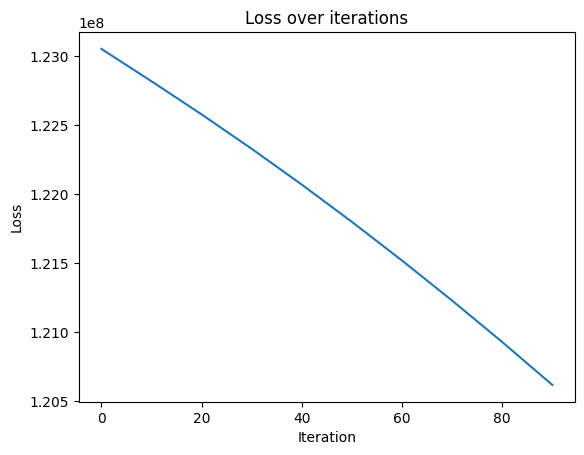

In [23]:
# Plot loss values (optional, requires matplotlib)
import matplotlib.pyplot as plt

plt.plot(range(0, 100, 10), loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss over iterations')
plt.show()

# CYK

In [24]:
grammar = [
    ('S', 'NP', 'VP'),
    ('NP', 'Det', 'Noun'),
    ('NP', 'Noun'),
    ('VP', 'Verb', 'Adv'),
    ('VP', 'Verb', 'NP'),
    ('VP', 'Verb'),
    ('Det', 'the'),
    ('Noun', 'birds'),
    ('Noun', 'sun'),
    ('Noun', 'cars'),
    ('Noun', 'apples'),
    ('Noun', 'books'),
    ('Noun', 'minds'),
    ('Verb', 'fly'),
    ('Verb', 'shines'),
    ('Verb', 'move'),
    ('Verb', 'taste'),
    ('Verb', 'open'),
    ('Adv', 'high'),
    ('Adv', 'brightly'),
    ('Adv', 'fast'),
    ('Adv', 'sweet'),
]

In [25]:
def cyk_parse(sentence, grammar):
    tokens = sentence.split()
    print(tokens)
    n = len(tokens)
    table = [[set() for _ in range(n+1)] for _ in range(n+1)]

    # Initialization
    for i in range(1, n+1):
        for rule in grammar:
            if rule[1] == tokens[i-1]:
                table[i][i].add(rule[0])


    # Rule Application
    for length in range(2, n+1):
        for i in range(1, n-length+2):
            j = i + length - 1
            for k in range(i, j):
                for rule in grammar:
                    if len(rule) == 3:
                        if rule[1] in table[i][k] and rule[2] in table[k+1][j]:
                            table[i][j].add(rule[0])


    print("table[1][n]", table[1][n])
    if 'S' in table[1][n]:
        return True, table
    else:
        return False, table

# Example usage
import string

def remove_punctuation(sentence):
    return sentence.translate(str.maketrans('', '', string.punctuation))

def print_table(table):
    for row in table:
        print(row)

# List of sentences
sentences = [
    "Birds fly high.",
    "The sun shines brightly.",
    "Cars move fast.",
    "Apples taste sweet.",
    "Books open minds."
]

# Apply CYK parsing to each sentence
for sentence in sentences:
    sentence = remove_punctuation(sentence).lower()
    parsed, table = cyk_parse(sentence, grammar)
    print(f"Input sentence: '{sentence}'")
    print("Parse table:")
    print_table(table)
    if parsed:
        print("Sentence parsed successfully.")
    else:
        print("Sentence not parsed.")
    print()



['birds', 'fly', 'high']
table[1][n] set()
Input sentence: 'birds fly high'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), {'Adv'}]
Sentence not parsed.

['the', 'sun', 'shines', 'brightly']
table[1][n] {'S'}
Input sentence: 'the sun shines brightly'
Parse table:
[set(), set(), set(), set(), set()]
[set(), {'Det'}, {'NP'}, set(), {'S'}]
[set(), set(), {'Noun'}, set(), set()]
[set(), set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), set(), {'Adv'}]
Sentence parsed successfully.

['cars', 'move', 'fast']
table[1][n] set()
Input sentence: 'cars move fast'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set(), set(), set(), {'Adv'}]
Sentence not parsed.

['apples', 'taste', 'sweet']
table[1][n] set()
Input sentence: 'apples taste sweet'
Parse table:
[set(), set(), set(), set()]
[set(), {'Noun'}, set(), set()]
[set(), set(), {'Verb'}, {'VP'}]
[set

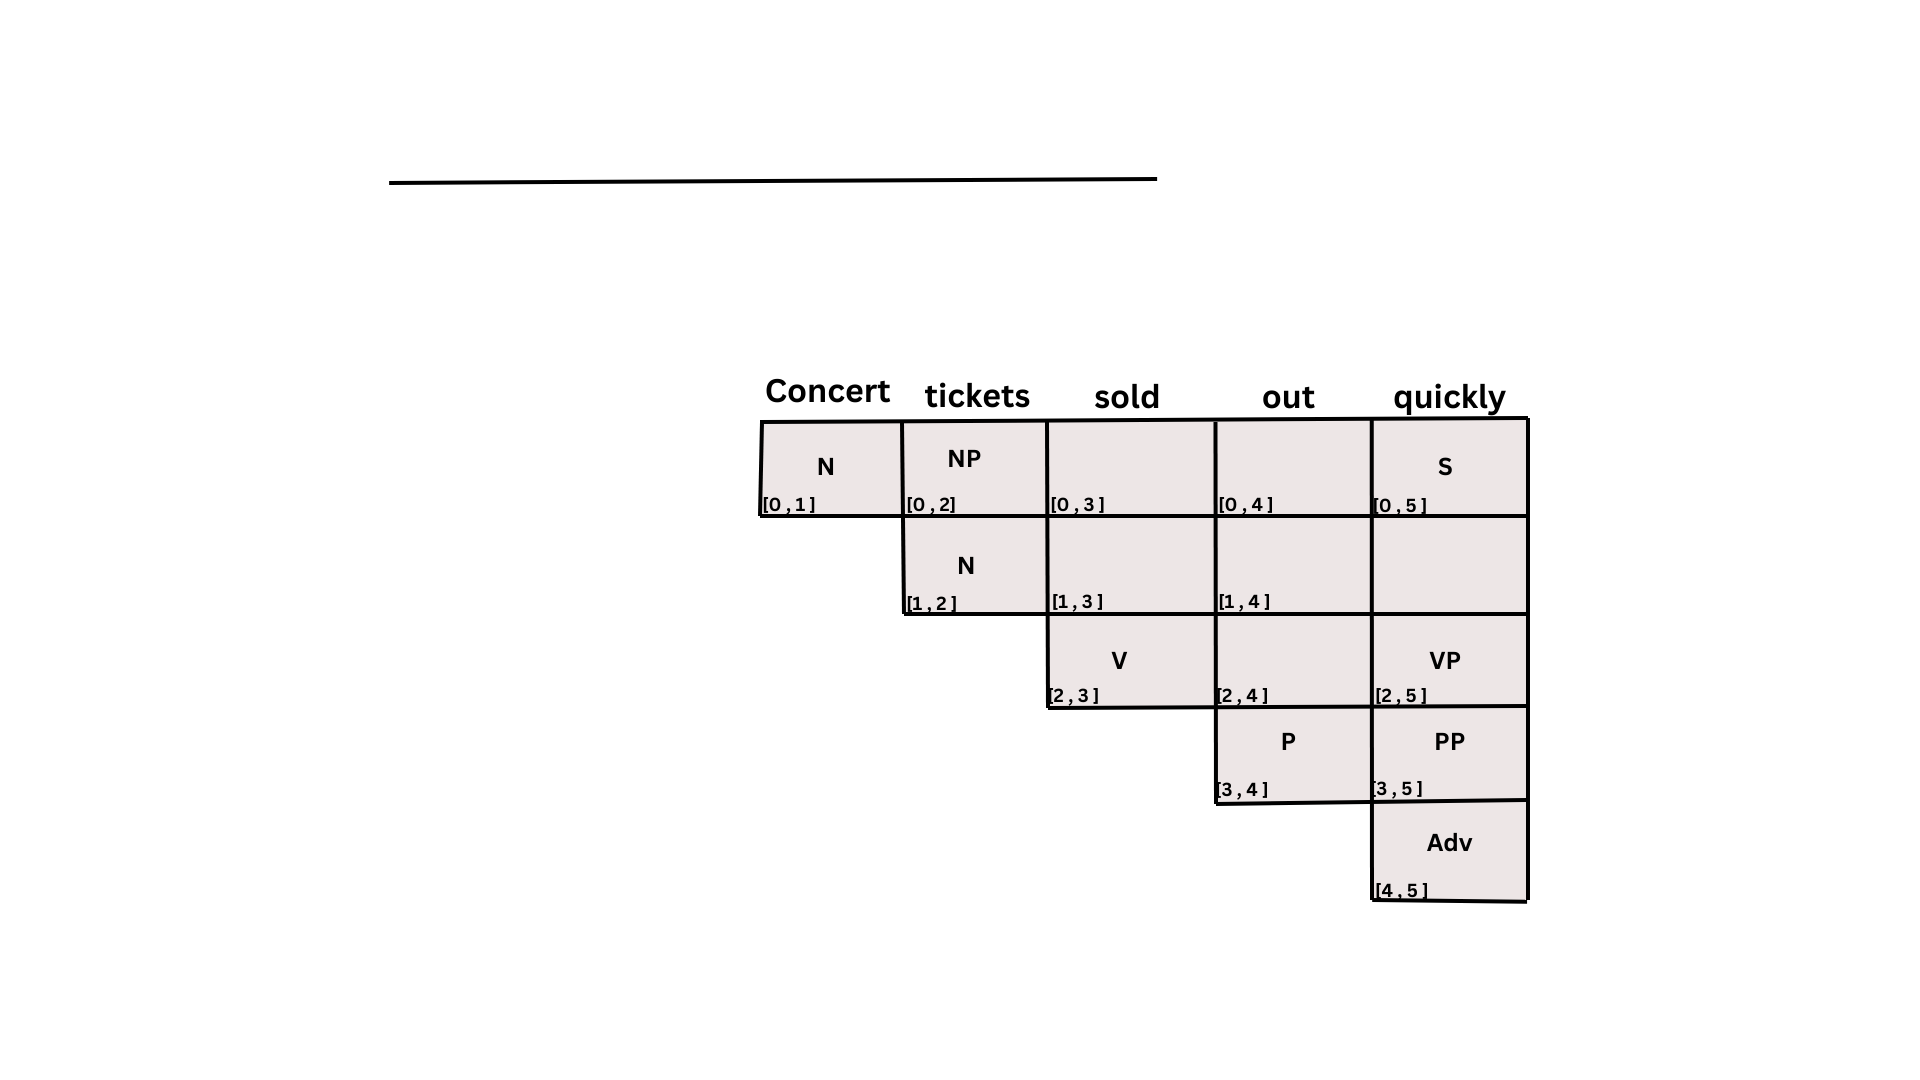

# **HW3**

# RNN

,label,text,word_count,nltk_tokens,lemmatized_spacy,stemmed_nltk
0,ham,go jurong point crazy available bugis n great ...,16,"[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...
1,ham,ok lar joking wif u oni,6,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,ok lar joke wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,23,"[free, entry, 2, wkly, comp, win, fa, cup, fin...",free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say early hor u c already say,9,"[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say,u dun say earli hor u c alreadi say
4,ham,nah dont think goes usf lives around though,8,"[nah, dont, think, goes, usf, lives, around, t...",nah do not think go usf live around though,nah dont think goe usf live around though
...,...,...,...,...,...,...
5567,spam,2nd time tried 2 contact u u 750 pound prize 2...,20,"[2nd, time, tried, 2, contact, u, u, 750, poun...",2nd time try 2 contact u u 750 pound prize 2 c...,2nd time tri 2 contact u u 750 pound prize 2 c...
5568,ham,b going esplanade fr home,5,"[b, going, esplanade, fr, home]",b go esplanade fr home,b go esplanad fr home
5569,ham,pity mood soany suggestions,4,"[pity, mood, soany, suggestions]",pity mood soany suggestion,piti mood soani suggest
5570,ham,guy bitching acted like id interested buying s...,14,"[guy, bitching, acted, like, id, interested, b...",guy bitching act like i d interested buy somet...,guy bitch act like id interest buy someth els ...


In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example text data
text_data =df_spam['text']

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

# Prepare data for next word prediction
X = []
y = []

for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])
        y.append(seq[i])

# Pad sequences to the same length
max_length = max([len(seq) for seq in X])
X = pad_sequences(X, maxlen=max_length, padding='pre')
y = np.array(y)

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1


In [42]:
# Build the RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(vocab_size, activation='softmax'))

# Compile the model
rnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X, y, epochs=50, verbose=2)

Epoch 1/50
1455/1455 - 67s - loss: 8.0896 - accuracy: 0.0204 - 67s/epoch - 46ms/step
Epoch 2/50
1455/1455 - 58s - loss: 7.5555 - accuracy: 0.0250 - 58s/epoch - 40ms/step
Epoch 3/50
1455/1455 - 56s - loss: 7.0391 - accuracy: 0.0417 - 56s/epoch - 38ms/step
Epoch 4/50
1455/1455 - 56s - loss: 6.4766 - accuracy: 0.0746 - 56s/epoch - 39ms/step
Epoch 5/50
1455/1455 - 58s - loss: 5.9590 - accuracy: 0.1154 - 58s/epoch - 40ms/step
Epoch 6/50
1455/1455 - 77s - loss: 5.4987 - accuracy: 0.1561 - 77s/epoch - 53ms/step
Epoch 7/50
1455/1455 - 59s - loss: 5.0911 - accuracy: 0.1966 - 59s/epoch - 41ms/step
Epoch 8/50
1455/1455 - 56s - loss: 4.7269 - accuracy: 0.2399 - 56s/epoch - 38ms/step
Epoch 9/50
1455/1455 - 58s - loss: 4.4039 - accuracy: 0.2828 - 58s/epoch - 40ms/step
Epoch 10/50
1455/1455 - 60s - loss: 4.1039 - accuracy: 0.3241 - 60s/epoch - 41ms/step
Epoch 11/50
1455/1455 - 56s - loss: 3.8351 - accuracy: 0.3621 - 56s/epoch - 39ms/step
Epoch 12/50
1455/1455 - 56s - loss: 3.5900 - accuracy: 0.3989 -

In [43]:

# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_length):
    sequence = tokenizer.texts_to_sequences([text])
    sequence = pad_sequences(sequence, maxlen=max_length, padding='pre')
    predicted_probs = model.predict(sequence, verbose=0)
    predicted_word_index = np.argmax(predicted_probs, axis=-1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

# Test the prediction
input_text = "The "
next_word = predict_next_word(rnn_model, tokenizer, input_text, max_length)
print("Next word prediction:", next_word)


Next word prediction: got


# LSTM

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Example data (replace with your dataset preparation)
text_data = df['posts'].head(3000)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
encoded_text = tokenizer.texts_to_sequences(text_data)

# Create input-output pairs
sequences = []
for seq in encoded_text:
    for i in range(1, len(seq)):
        sequence = seq[:i+1]
        sequences.append(sequence)

# Pad sequences for equal length
max_sequence_len = max([len(seq) for seq in sequences])
sequences = np.array(pad_sequences(sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
X, y = sequences[:,:-1], sequences[:,-1]
y = np.array(tf.keras.utils.to_categorical(y, num_classes=len(tokenizer.word_index)+1))

# Define LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(len(tokenizer.word_index)+1, 10, input_length=max_sequence_len-1))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(len(tokenizer.word_index)+1, activation='softmax'))

# Compile model
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
lstm_history = lstm_model.fit(X, y, epochs=150, verbose=1)





Epoch 1/150
24/24 [==============================] - 7s 77ms/step - loss: 6.1317 - accuracy: 0.0345
Epoch 2/150
24/24 [==============================] - 2s 76ms/step - loss: 6.0314 - accuracy: 0.0425
Epoch 3/150
24/24 [==============================] - 2s 73ms/step - loss: 5.8643 - accuracy: 0.0425
Epoch 4/150
24/24 [==============================] - 3s 106ms/step - loss: 5.7986 - accuracy: 0.0425
Epoch 5/150
24/24 [==============================] - 3s 115ms/step - loss: 5.7820 - accuracy: 0.0425
Epoch 6/150
24/24 [==============================] - 2s 74ms/step - loss: 5.7707 - accuracy: 0.0425
Epoch 7/150
24/24 [==============================] - 2s 77ms/step - loss: 5.7637 - accuracy: 0.0425
Epoch 8/150
24/24 [==============================] - 2s 78ms/step - loss: 5.7595 - accuracy: 0.0425
Epoch 9/150
24/24 [==============================] - 2s 78ms/step - loss: 5.7489 - accuracy: 0.0425
Epoch 10/150
24/24 [==============================] - 2s 75ms/step - loss: 5.7479 - accuracy: 0.04

In [50]:
# Example prediction
input_text = "company"
encoded_input = tokenizer.texts_to_sequences([input_text])[0]
encoded_input = pad_sequences([encoded_input], maxlen=max_sequence_len-1, padding='pre')
predicted_index = np.argmax(lstm_model.predict(encoded_input), axis=-1)

# Convert index back to word
predicted_word = tokenizer.index_word[predicted_index[0]]
print(f"Predicted next word: {predicted_word}")

1/1 [==============================] - 0s 475ms/step
Predicted next word: semiconductor


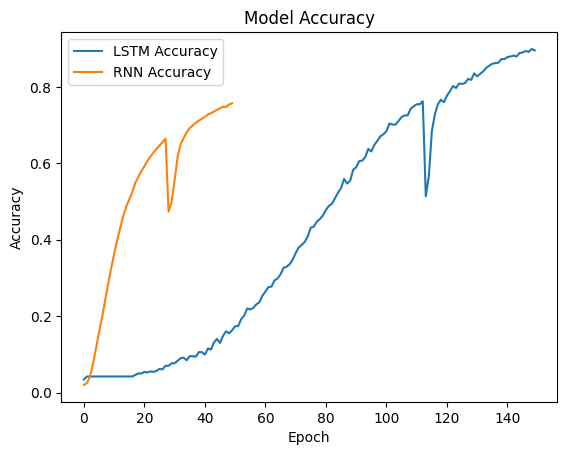

In [51]:
# Compare accuracy
import matplotlib.pyplot as plt

plt.plot(lstm_history.history['accuracy'], label='LSTM Accuracy')
plt.plot(rnn_history.history['accuracy'], label='RNN Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

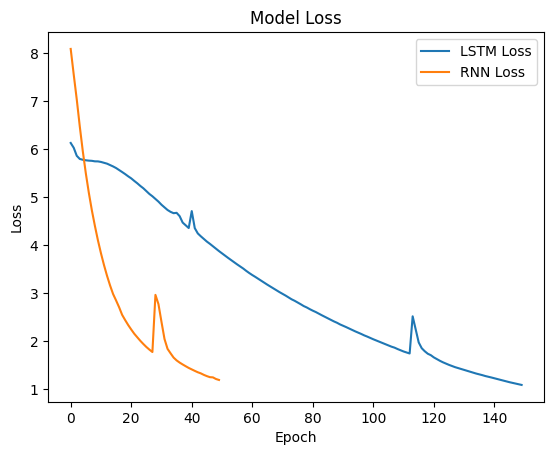

In [52]:
plt.plot(lstm_history.history['loss'], label='LSTM Loss')
plt.plot(rnn_history.history['loss'], label='RNN Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# 6. GPT-2
Select 5 partial sentences
from the corpus, and use the fine-tuned GPT-2 model to generate completions for those
partial sentences.

In [54]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained model and tokenizer
model_name = 'gpt2'
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [59]:
# Extract partial sentences
partial_sentences = [text.split()[:3] for text in df_spam['text'].head(20)]
partial_sentences = [' '.join(sentence) for sentence in partial_sentences]
len(partial_sentences)

20

In [60]:
# Generate completions for each partial sentence
print("\nGenerated Completions:")
for sentence in partial_sentences:
    inputs = tokenizer.encode(sentence, return_tensors='pt')
    outputs = model.generate(inputs, max_length=50, num_return_sequences=1, no_repeat_ngram_size=2,
                             top_p=0.95, top_k=60)

    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    print(f"Original: {sentence}\nCompletion: {generated_text}\n")

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:562: UserWarning: `do_sample` is set to `False`. However, `top_k` is set to `60` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_k`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Generated Completions:


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: go jurong point
Completion: go jurong point, and the other two are the same.

The first is the one that is called the "Bakkali" (the "Kali") and is a place where the Buddha was born. The second is "



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: ok lar joking
Completion: ok lar joking about the fact that he's a "fucking idiot" and that "he's not even a human."

"I'm not a fucking human," he says. "I just want to be a good human. I want



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: free entry 2
Completion: free entry 2.0.1.2.jar) Unloaded->Constructed->Pre-initialized->Initialized->Post-Redstone{2} [Red-Stuff-2] (RedStuffs-1-62.zip) UCHIJAAAA



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: u dun say
Completion: u dun sayin'

"I'm not gonna say anything about it. I'm gonna just say that I love you."
.
 (I love him)
 "I don't know what to say. You're my friend.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: nah dont think
Completion: nah dont think so.

I'm not sure if you're right or not, but I think it's a good idea to have a few people who are not in the know about the game. I'm sure there are people out there who



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: freemsg hey darling
Completion: freemsg hey darling, I'm not sure if you're ready for this, but I think you should try it. I know you've been thinking about this for a while, and I've always wanted to try something new. But I don



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: even brother like
Completion: even brother like me) and I'm not sure if I'll ever be able to get over it. I've been trying to figure out how to deal with it for a while now, but I don't know how I can get through it without



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: per request melle
Completion: per request melle.com/

The following is a list of all the websites that have been listed as being in the "Top 10" list.
...
 (1) The following websites are listed in "The Top 10



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: winner valued network
Completion: winner valued network.

The company's CEO, Mark Zuckerberg, said in a statement that the company was "deeply saddened" by the news. "We are deeply saddened by this news and we are working to resolve this issue," he said



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: mobile 11 months
Completion: mobile 11 months ago

We are excited to announce that we have partnered with the best in the industry to bring you the latest in our new mobile app. We are now offering a free trial of the app for the first time.
..



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: im gonna home
Completion: im gonna home.

I'm gonna go home and I'm going to go to the bathroom. I'll go back to my room. And I don't know what's going on. But I know I've got to get out of here



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: six chances win
Completion: six chances win the game.

The game was played in the second half of the first half, with the goal being scored by the goalkeeper. The goal was scored on the spot by a defender.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: urgent 1 week
Completion: urgent 1 week ago

The first of two new episodes of the series will be released on October 1st. The first episode will feature a new character, a young girl named "The Girl Who Lived." The second episode features a character



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: ive searching right
Completion: ive searching right now.

"I'm not sure if I'm going to be able to do that," he said. "I don't know if it's going be a good thing or not. I don' know. But I know



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: date sunday
Completion: date sunday.

The first thing I did was to go to the local grocery store and buy a few things. I bought a couple of different things, but I didn't really know what to expect. The first one was a bag of



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: xxxmobilemovieclub use credit
Completion: xxxmobilemovieclub use credit card to purchase tickets.

The following is a list of all the major ticketing sites that have been affected by the outage. The list is not exhaustive. If you have any questions, please contact us.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: oh kim watching
Completion: oh kim watching the game.

"I'm not going to be able to play for the rest of my life," he said. "I don't want to go to college. I want my family to know that I'm here.



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: eh u remember
Completion: eh u remember the time when you were a kid and you had to go to school and go out and play with your friends and your family and all of that stuff.

"I remember when I was a little kid, I had a lot



The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Original: fine thats way
Completion: fine thats way too much for me to handle.

Anonymous 05/12/15 (Tue) 03:49:39 AM No. 95955 >>95956



I'm not sure if this is a good idea or

Original: england v macedonia
Completion: england v macedonia, the first of the three major European wars, was fought in 1814. The war was won by the French, who had been defeated by Spain in the First World War.

The war ended in a stal



# 7.sentiment analysis

In [62]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [63]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

for sentence in sentences[:10]:
  # Perform sentiment analysis
  sentiment_scores = sid.polarity_scores(sentence)

  # Calculate the sentiment statistics
  positive_sentiment = sentiment_scores['pos'] * 100
  negative_sentiment = sentiment_scores['neg'] * 100
  neutral_sentiment = sentiment_scores['neu'] * 100

  # Display the sentiment statistics
  print(f"Sentence:{sentence}")
  print("Sentiment Analysis Statistics:")
  print(f"Positive sentiment: {positive_sentiment}%")
  print(f"Negative sentiment: {negative_sentiment}%")
  print(f"Neutral sentiment: {neutral_sentiment}%")
  print()

Sentence:Birds fly high.
Sentiment Analysis Statistics:
Positive sentiment: 0.0%
Negative sentiment: 0.0%
Neutral sentiment: 100.0%

Sentence:The sun shines brightly.
Sentiment Analysis Statistics:
Positive sentiment: 45.5%
Negative sentiment: 0.0%
Neutral sentiment: 54.50000000000001%

Sentence:Cars move fast.
Sentiment Analysis Statistics:
Positive sentiment: 0.0%
Negative sentiment: 0.0%
Neutral sentiment: 100.0%

Sentence:Apples taste sweet.
Sentiment Analysis Statistics:
Positive sentiment: 60.0%
Negative sentiment: 0.0%
Neutral sentiment: 40.0%

Sentence:Books open minds.
Sentiment Analysis Statistics:
Positive sentiment: 0.0%
Negative sentiment: 0.0%
Neutral sentiment: 100.0%



# **WhatsApp Analysis**

In [ ]:
with open('whatsapp.txt', 'r', encoding='utf-8') as file:
    whatsapp_data = file.read()

FileNotFoundError: [Errno 2] No such file or directory: 'whatsapp.txt'

In [ ]:

import pandas as pd
import re

# Split raw data by newline
lines = whatsapp_data.strip().split('\n')

# Function to extract name and message, and remove name from message
def process_line(line):
    pattern = r'~\s*(.*?):\s*(.*)'
    match = re.search(pattern, line)
    if match:
        name = match.group(1).strip()
        message = match.group(2).strip()
        return name, message
    else:
        return None, line.strip()

# Process each line
data = []
for line in lines:
    name, message = process_line(line)
    if name:
        data.append({'name': name, 'message': message})



In [ ]:
# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df)
df.to_csv("/content/whatsapp_data.csv")

# Basic Analysis - Before Processing

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------Before Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

# Cleaning Data

In [ ]:
df = data_cleaning(df, 'message')
df


In [ ]:
len(df)

In [ ]:
pd.set_option('display.max_colwidth', None)
df
df.to_csv("/content/whatsapp_data_clean.csv", index=False)

# Basic Analysis - After Processing

In [ ]:
# Combine all text into a single string
all_words = ' '.join(df['message']).lower()

print("---------After Text Processing-------")
# Total number of messages
total_num_of_data(df)

print_word_statistics(df['message'])

# Average number of words per message
avg_words_per_message(df, 'message')
# 5 most frequent words
most_frequent_words(df, all_words, 5)
# Number of words that only appear once
count_of_words_apear_once(df, all_words)

# **whatapp tokenazition**

# Word tokenizer

In [ ]:
start_time = time.time()

# Tokenize using NLTK
df['nltk_tokens'] = df['message'].apply(word_tokenize)

nltk_time = time.time() - start_time
print(f"NLTK tokenization time: {nltk_time} seconds")
print(df['nltk_tokens'].head(10))

In [ ]:
import time
# Using list comprehension to flatten the lists in the 'nltk_tokens' column
all_tokens = [token for sublist in df['nltk_tokens'] for token in sublist]

print(all_tokens)

start_time = time.time()

for w in all_tokens:
   (w, " : ", lemmatizer.lemmatize(w, pos='v'))
time = time.time() - start_time
time

In [ ]:
from nltk.stem import PorterStemmer
import time
# NLTK Stemming
def stem_with_nltk(text):
    stemmer = PorterStemmer()
    stemmed_words = [stemmer.stem(w) for w in all_tokens]
    return ' '.join(stemmed_words)

start_time = time.time()
stemmed_words = stem_with_nltk(all_tokens)
nltk_time = time.time() - start_time

print("Stemmed dataframe using NLTK:")
print(stemmed_words)
print(f"Stemming time using NLTK: {nltk_time:.6f} seconds")